### 참고 사이트

+ http://metplotlib.org
+ http://seaborn.pydata.org


### 기본 그래프

    선(line), 막대(bar), 히스토그램(histogram), 산포도(scatter), 상자(box)
    
    
### 질적 데이터

+ 요약 방법 : 도표
+ 정리 방법 : 도수 분포표, 분할표
+ 그래프 : 막대 그래프, 원 그래프, ...

### 양적 데이터

+ 요약 방법 : 수치
+ 정리 방법 : 산술평균, 중앙값 , ...
+ 그래프 : 히스토그램, Boxplot, Scatter plot, 시계열(선) 그래프,...

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc("font",family=font_name)

import matplotlib as mlp
mlp.rcParams['axes.unicode_minus'] = False

import seaborn as sns

### 1. 선 그래프

AttributeError: 'PlotAccessor' object has no attribute 'point'

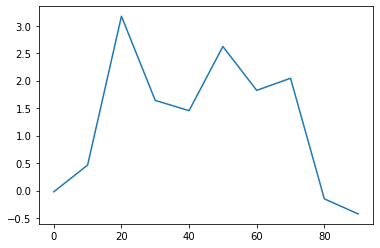

In [11]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s
s.plot()
s.plot.point()

<AxesSubplot:>

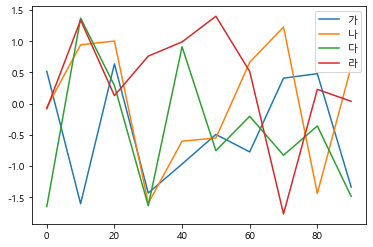

In [32]:
df1 = pd.DataFrame(np.random.randn(10,4),columns=['가','나','다','라'],
                  index=np.arange(0,100,10))
df1
df1.plot()

<AxesSubplot:>

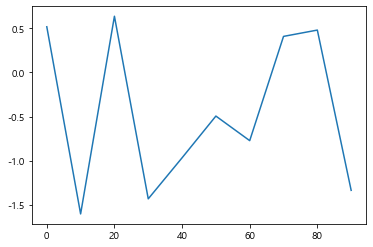

In [34]:
df1['가'].plot()

### 2. 막대 그래프

<AxesSubplot:>

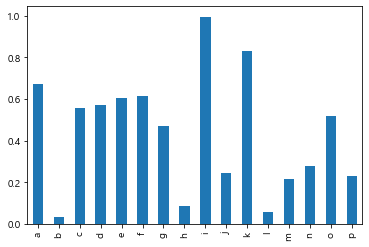

In [38]:
s2 = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
s2
s2.plot(kind='bar')
s2.plot.bar()

<bound method PlotAccessor.barh of <pandas.plotting._core.PlotAccessor object at 0x00000196F1B57190>>

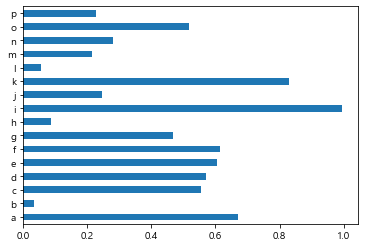

In [40]:
s2.plot(kind='barh')
s2.plot.barh

In [41]:
df2 = pd.DataFrame(np.random.rand(6,4),
                  index=['one','two','three','four','five','six'],
                  columns=pd.index(['A','B','C','D'],name='Genus'))
df2

AttributeError: module 'pandas' has no attribute 'index'

In [42]:
df2.plot(kind='barh',stacked=True)

NameError: name 'df2' is not defined

### 3. histogram

+ Y뱐수가 가질 수 있는 값의 범위
+ 값만 필요하고 인덱스는 핗요 없다

<AxesSubplot:>

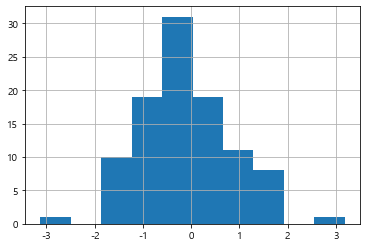

In [47]:
s = pd.Series(np.random.normal(0,1,size=100))
s
s.hist()

<AxesSubplot:>

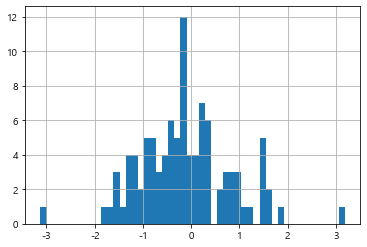

In [49]:
s.hist(bins=50)

### 4. 산포도(산점도, Scatter Plot)

+ 두 변수의 관계를 확인 : 양, 음

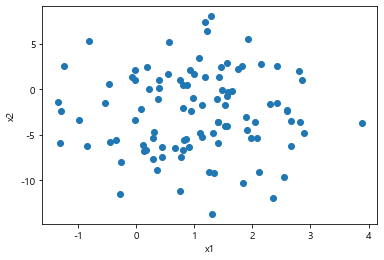

In [60]:
x1 = np.random.normal(1,1,size=(100,1))
x1

x2 = np.random.normal(-2,4,size=(100,1))
x2

x = np.concatenate((x1,x2),axis=1)
x[:5]

df = pd.DataFrame(x,columns=['x1','x2'])
df

df.plot.scatter('x1','x2')
plt.scatter(df['x1'],df['x2'])

### 5. 상자 그래프(Boxplot)

<AxesSubplot:>

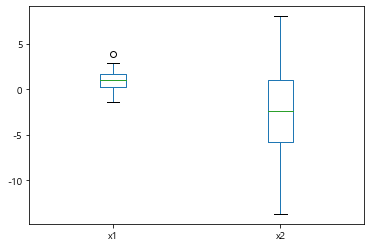

In [61]:
df.plot.box()

### 6. 활용 예제1

+ seaborn의 tips

#### 1) 데이터 준비

In [63]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 2) total_bill에 대한 금액 분포 확인

Text(0, 0.5, 'total_bill')

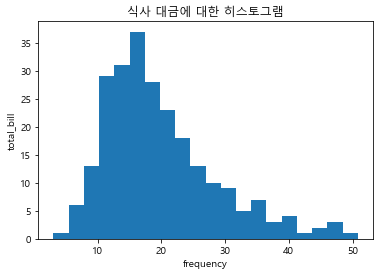

In [73]:
#tips['total_bill'].hist()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(tips['total_bill'], bins=20)
ax.set_title('식사 대금에 대한 히스토그램')
ax.set_xlabel('frequency')
ax.set_ylabel('total_bill')


#### 3) total_bill과 tip의 관계를 알고 싶다.

Text(0, 0.5, 'total_bill')

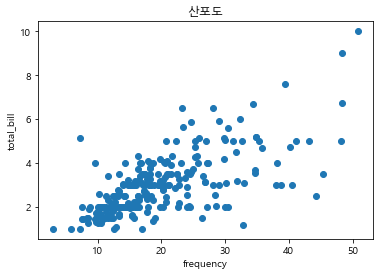

In [78]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = tips['total_bill']
y = tips['tip']

ax.scatter(x, y)
ax.set_title('산포도')
ax.set_xlabel('frequency')
ax.set_ylabel('total_bill')

#### 4) 성별에 따른 total_bill과 tip의 관계를 알고 싶다.

Text(0.5, 0, 'total_bill')

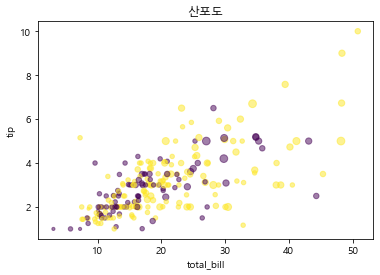

In [85]:
def record_sex(sex):
    if sex == 'Female':
        return 0 
    else:
        return 1
    
#######################################

tips['sex_color'] = tips['sex'].apply(record_sex)
tips.head()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = tips['total_bill']
y = tips['tip']

ax.scatter(x, y,c=tips['sex_color'],alpha=0.5,
          s=tips['size']*10)
ax.set_title('산포도')
ax.set_ylabel('tip')
ax.set_xlabel('total_bill')

#### 5) 성별과 팁의 관계

Text(0.5, 0, 'sex')

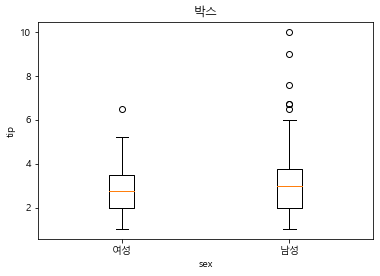

In [90]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = tips[tips['sex']=='Female']['tip'], tips[tips['sex']=='Male']['tip']
y = tips['tip']

ax.boxplot(x,labels=['여성','남성'])
ax.set_title('박스')
ax.set_ylabel('tip')
ax.set_xlabel('sex')

#### 7. 활용 예제2

+ 전국 신규 민간 아파트 분양가격 동향

#### 1) 데이터 준비

+ https://data.go.kr/dataset/3035522/fileData.do


In [122]:
##### 데이터 불러오기 및 확인
apt = pd.read_csv('data/apt.csv',encoding='euc-kr')
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [92]:
##### columns이름음 영어로 변경하고 (city, size, year, month, price), price는 숫자로 변경

In [93]:
##### 서울만 선택해서 '전체' size만 확인

In [94]:
##### size컬럼 삭제하고 다중index로(year, month) 조정

In [95]:
##### 서울지역 전체 크기별 월별 제곱미터 당 가격(천원) 변화 추이를 그래프로 출력

### 8. seaborn

In [96]:
tips = sns.load_dataset('tips')

C:\Users\leewy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'total_bill')

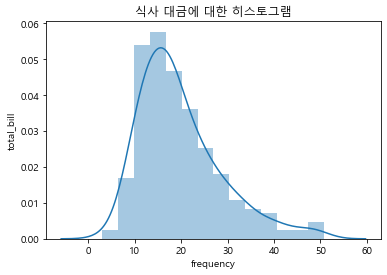

In [100]:
##### total_bill에 대한 금액 분포 확인

ax = sns.distplot(tips['total_bill'])

ax.set_title('식사 대금에 대한 히스토그램')
ax.set_xlabel('frequency')
ax.set_ylabel('total_bill')


C:\Users\leewy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'total_bill')

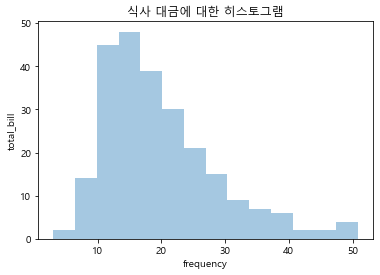

In [102]:
ax = sns.distplot(tips['total_bill'], kde=False)

ax.set_title('식사 대금에 대한 히스토그램')
ax.set_xlabel('frequency')
ax.set_ylabel('total_bill')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

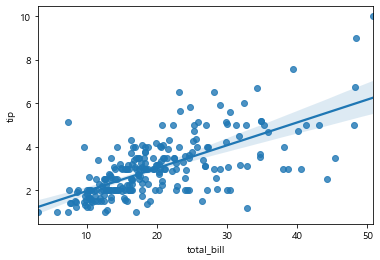

In [104]:
sns.regplot(x='total_bill',y='tip',data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

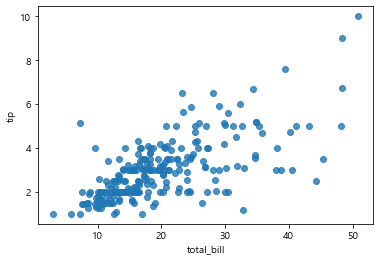

In [105]:
sns.regplot(x='total_bill',y='tip',data=tips,fit_reg=False)

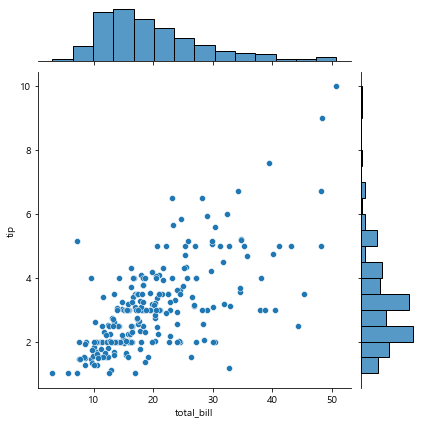

In [107]:
sns.jointplot(x='total_bill',y='tip',data=tips)

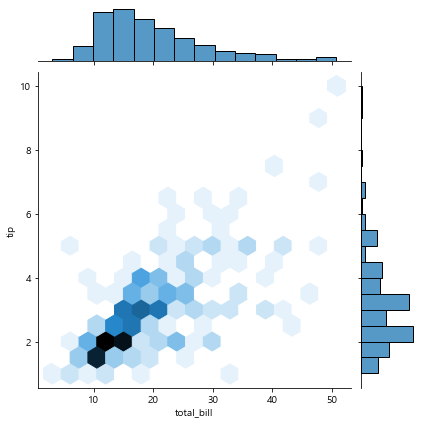

In [108]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

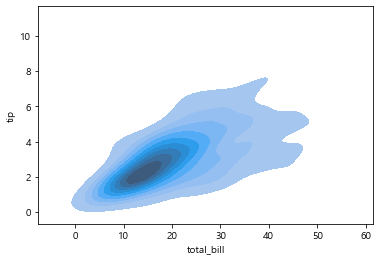

In [110]:
sns.kdeplot(x='total_bill',y='tip',data=tips,shade=True)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

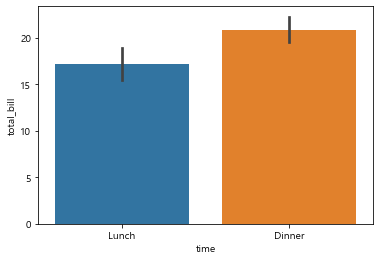

In [111]:
sns.barplot(x='time',y='total_bill',data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

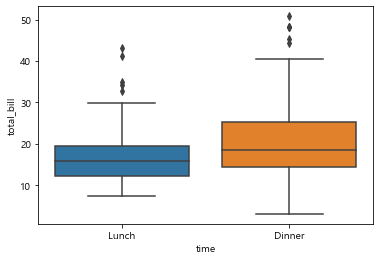

In [113]:
sns.boxplot(x='time',y='total_bill',data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

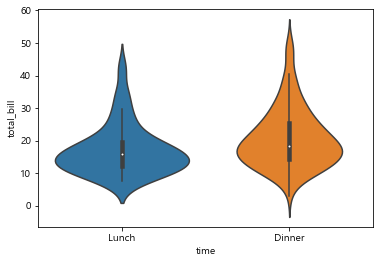

In [114]:
sns.violinplot(x='time',y='total_bill',data=tips)

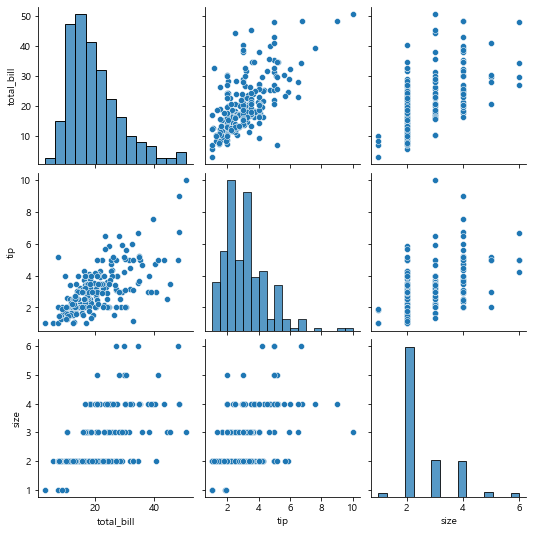

In [115]:
sns.pairplot(tips)

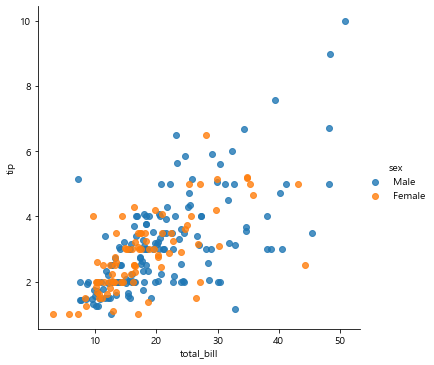

In [119]:
##### 성별에 따른 total_bill과 tip의 관계를 알고 싶다.

sns.lmplot(x='total_bill',y='tip',data=tips,fit_reg=False,hue='sex')

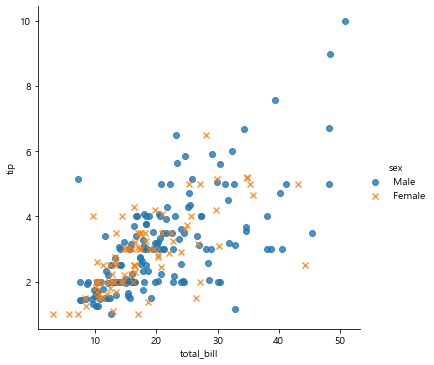

In [120]:
sns.lmplot(x='total_bill',y='tip',data=tips,fit_reg=False,hue='sex',
          markers=['o','x'])

### 9. 활용 예제2

+ 타이타닉 샘플 : http://www.kaggle.com/c/titanic

#### 1) 데이터 준비

In [123]:
train = pd.read_csv('data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
# 결측치 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 2) EDA

In [133]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))
    print(survived)

female    233
male      109
Name: Sex, dtype: int64


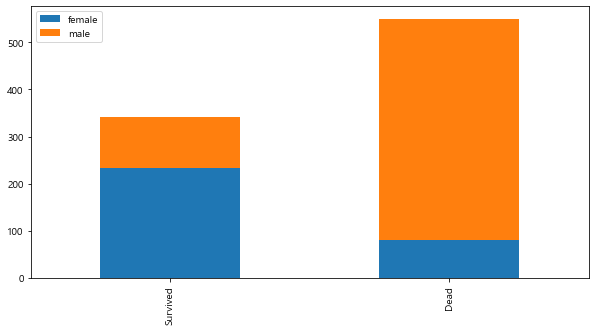

In [134]:
bar_chart('Sex')

1    136
3    119
2     87
Name: Pclass, dtype: int64


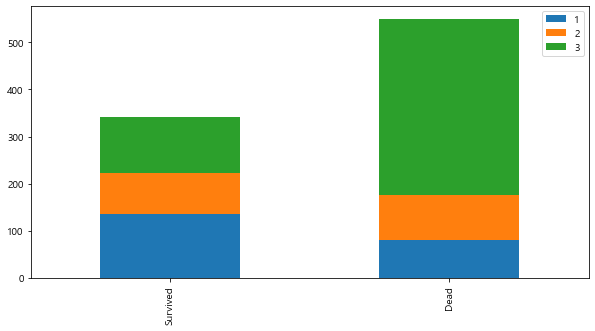

In [136]:
bar_chart('Pclass')

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64


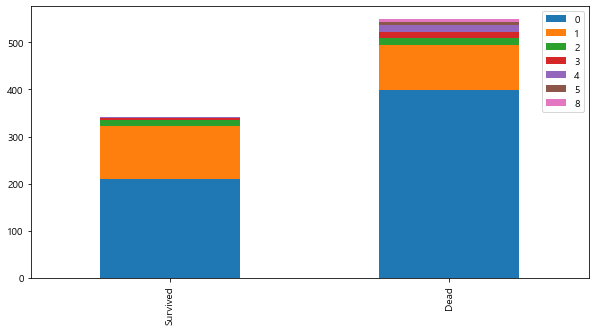

In [137]:
bar_chart('SibSp')

0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64


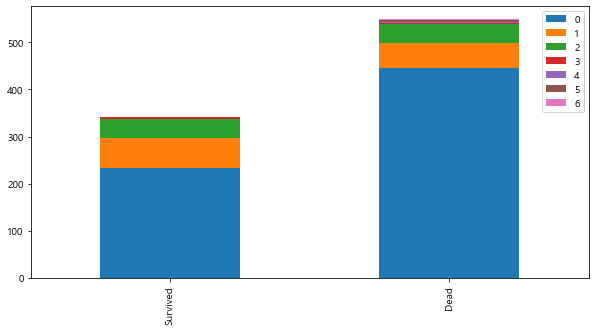

In [138]:
bar_chart('Parch')

S    217
C     93
Q     30
Name: Embarked, dtype: int64


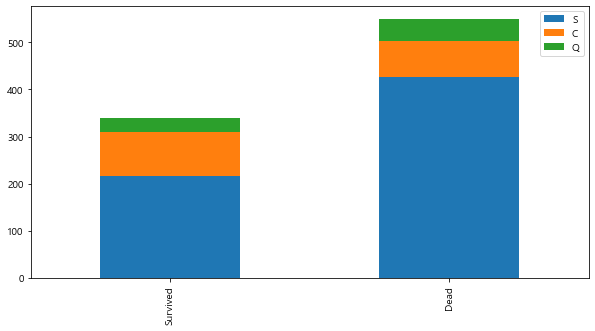

In [139]:
bar_chart('Embarked')

#### 3) Feature Engineering

In [149]:
##### Name
train['title']=train['Name'].str.extract(' ([A-Za-z]+)\.')
train['title'].value_counts()

title_mapping = {'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':3,'Rev':3,'Major':3,
                 'Mlle':3,'Col':3,'Sir':3,'Don':3,'Mme':3,'Lady':3,'Johkheer':3,
                'Countess':3,'Capt':3,'Ms':3}

train['title'] = train['title'].map(title_mapping)
train['title'].value_counts()

0.0    517
1.0    182
2.0    125
3.0     66
Name: title, dtype: int64

1.0    127
2.0     99
0.0     81
3.0     35
Name: title, dtype: int64


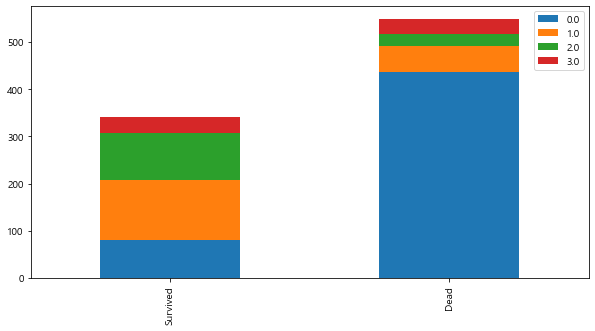

In [150]:
bar_chart('title')

In [159]:
##### Age

train['Age'].fillna(train.groupby('title')['Age'].transform('median'),inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        890 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


(0.0, 20.0)

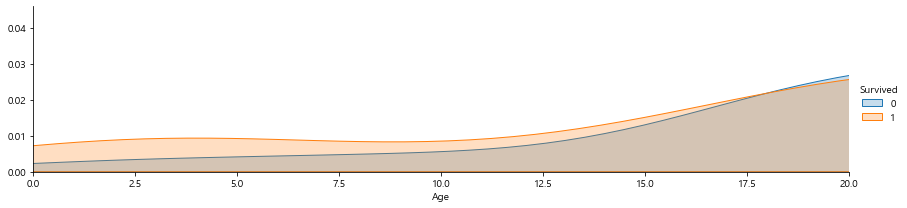

In [166]:
facet = sns.FacetGrid(train,hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.add_legend()
facet.set(xlim=(0,train['Age'].max()))
plt.xlim(0,20)

(20.0, 30.0)

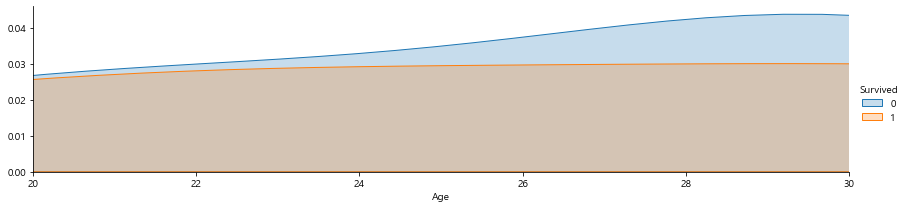

In [167]:
facet = sns.FacetGrid(train,hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.add_legend()
facet.set(xlim=(0,train['Age'].max()))
plt.xlim(20,30)

### 10. 지도 시각화

+ pip install follium

In [168]:
import folium

In [172]:
#map = folium.Map(location=[37.498066296745314, 127.02751843538745])
map = folium.Map(location=[37.498066296745314, 127.02751843538745],zoom_start = 15,tiles='Stamen Toner')
map

#### 1) 미국 50개주의 실업률 표시

In [175]:
state_unemp = pd.read_csv('data/map/folium_US_Unemployment_Oct2012.csv')
state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [185]:
state_geo = 'data/map/folium_us-states.json'

map = folium.Map(location=[40,-98],zoom_start=4)
map.choropleth(geo_data=state_geo,data=state_unemp, key_on='feature.id',
              columns=['State','Unemployment'])
map

#### 2) Marking

In [200]:
map = folium.Map(location=[37.498066296745314, 127.02751843538745],zoom_start = 15)
map

marker = folium.Marker(location=[37.498066296745314, 127.02751843538745],
                       icon=folium.Icon('red',icon='star'),
                      popup='강남역 근처').add_to(map)
folium.CircleMarker(location=[37.498066296745314, 127.02751843538745], popup'강남역 근처',
                   radius=50, color='#ffffgg', fill_color='#fffggg').add_to(map)

map

SyntaxError: invalid syntax (<ipython-input-200-8f61cf9774a1>, line 7)

In [204]:
from folium import IFrame

In [212]:
map = folium.Map(location=[37.497911,127.027558],zoom_start=15)
text = '만은데이터입력'

iframe = folium.IFrame(text, width=700, height=250)
pop = folium.Popup(iframe, max_width=3000)

child = folium.Marker(location=[37.497911,127.027558], popup = pop, 
             icon = folium.Icon(icon_color='green'))
map.add_child(child)

map

### 11. WordCloud

+ pip install wordcloud

In [4]:
from wordcloud import WordCloud, STOPWORDS
import wordcloud

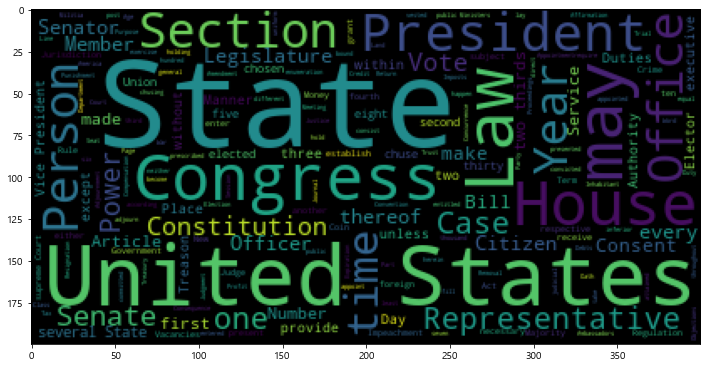

In [219]:
text = open('data/wordcloud/constitution.txt')
text = text.read()
text

wc = WordCloud().generate(text)
dir(wc)
wc.words_

plt.figure(figsize=(12,12))
plt.imshow(wc)

(-0.5, 399.5, 199.5, -0.5)

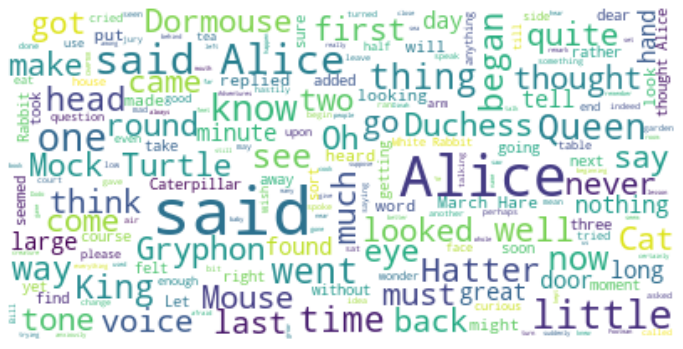

In [239]:
wc = WordCloud(max_font_size=40, background_color='white').generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')

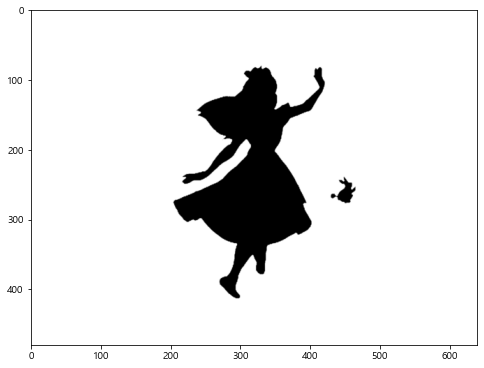

In [247]:
from PIL import Image

alice_mask = Image.open('data/wordcloud/alice_mask.png')
alice_mask

plt.figure(figsize=(8,8))
plt.imshow(alice_mask)

In [248]:
#wc = WordCloud(max_font_size=40, background_color='white', mask=alice_mask).generate(text)
text = open('data/wordcloud/alice.txt').read()
text

stopword = set(STOPWORDS)
stopword.add('said')

wc = WordCloud(max_font_size=40, background_color='white',mask=alice_mask,
              stopwords=stopword, max_words=500).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')

AttributeError: 'PngImageFile' object has no attribute 'dtype'

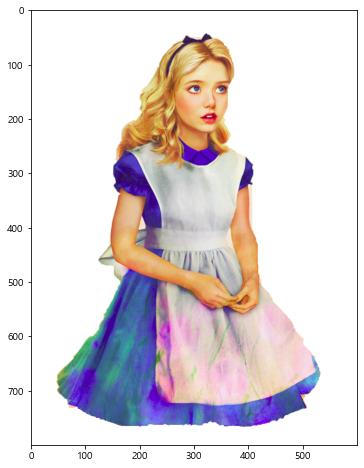

In [250]:
alice = Image.open('data/wordcloud/alice.png')
alice

plt.figure(figsize=(8,8))
plt.imshow(alice)

In [255]:
wc = WordCloud(max_font_size=40, background_color='white',mask=alice,
              stopwords=stopword, max_words=500).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')

AttributeError: 'PngImageFile' object has no attribute 'dtype'

In [258]:
import wordcloud
import numpy as np

wc = WordCloud(max_font_size=40, background_color='white',mask=alice,
              stopwords=stopword, max_words=500).generate(text)

image_color = wordcloud.ImageColorGenerator(alice+color)

plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis('off')

AttributeError: 'PngImageFile' object has no attribute 'dtype'

In [2]:
##### http://konlpy.org
##### pip install konlpy
##### https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
# 기존 konlpy 삭제 : pip uninstall konlpy
# 버전에 맞는 jpype1 설치
# 다시 konlpy 설치 : pip install konlpy
# pip uninstall jpype1

from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk

ModuleNotFoundError: No module named 'konlpy'

In [3]:
ko_t = kolaw.open('constitution.txt').read()
ko_t

# 형태소 분석
okt = Okt()
okt.nouns('아버지가방에들어가신다')
# okt.nouns('아버지가방에들어가신다')
token_ko = okt.nouns(ko_t)
token_ko
print(len(token_ko))
# 불용어 처리
stop_words = ['제','월','일','조','수','때','그','이','바','및','안','정','위','관']

token_ko = [for each_word in token_ko if each_word not in stop_words]
print(len(token_ko))

# 워드 카운팅
ko=nltk.Text(token_ko, name='헌법')
dir(ko)
data = ko.vocab().most_common(50)

wc = WordCloud(max_font_size=40, background_color='white',mask=alice,
               font_path='C:/Windows/Fonts/malgun.ttf').generate_from_frequencise(dict(data))

image_color = wordcloud.ImageColorGenerator(alice+color)

plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis('off')

SyntaxError: invalid syntax (<ipython-input-3-a023466f8e7f>, line 14)